# KNN Classifier

In [81]:
# kNN Using sci-kit learn
# iris Dataset

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# First assign the names of the columns for the dataset
names = ['sepal-length','sepal-width','petal-length','petal-width','class']

#Now read the dataset to pandas dataframe
dataset = pd.read_csv(url, names = names)


In [4]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,4].values

# print(dataset.iloc[:,4].values)
#print (X)
#print (Y)

In [6]:
# Split the data into training and testing data sets using train_test_split function

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size = 0.20)

# print(X_train.shape,'\n' , X_test.shape)


In [7]:
# Normalising the features is a very good practice for efficient and accurate predictions.
# Use the function StandardScaler from the preprocessing toolbox

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)   # To find the mean and std that can be used later

#print(scaler.mean_)

X_train = scaler.transform(X_train)   # Performs actual standardization
X_test = scaler.transform(X_test)

#print(X_train)

In [8]:
# Now train the model on the transformed training set

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [10]:
# Now the predicitons can be made on the test data to test the performance of our KNN

Y_predicted = classifier.predict(X_test)

# print(Y_test, '\n', Y_predicted)
print(Y_predicted.dtype)

object


In [16]:
# Evaluating the algorithm by using the confusion matrix and classification report

from sklearn.metrics import classification_report, confusion_matrix

confusion = confusion_matrix(Y_test, Y_predicted)     #use the corret ground truth values for the confusion matrices
print(confusion)
print(classification_report(Y_test, Y_predicted))


[[ 8  0  0]
 [ 0 12  0]
 [ 0  1  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.92      1.00      0.96        12
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



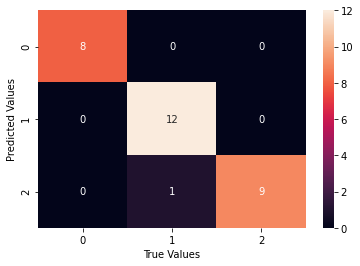

In [20]:
# Another way to intutivesly represent confusion matrix

from seaborn import heatmap

heatmap(confusion, annot = True)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()


In [91]:
# We can find the Values of K which gives the best results by running a for loop between say 1 and 40
#Initilize a list and append the error values later to the empyt list
error = []

for k in range(1,40):
    clsfy = KNeighborsClassifier(n_neighbors = k)
    clsfy.fit(X_train, Y_train)
    pred_k = clsfy.predict(X_test)
    error.append(np.mean(pred_k != Y_test))

    

Text(0, 0.5, 'Mean Error')

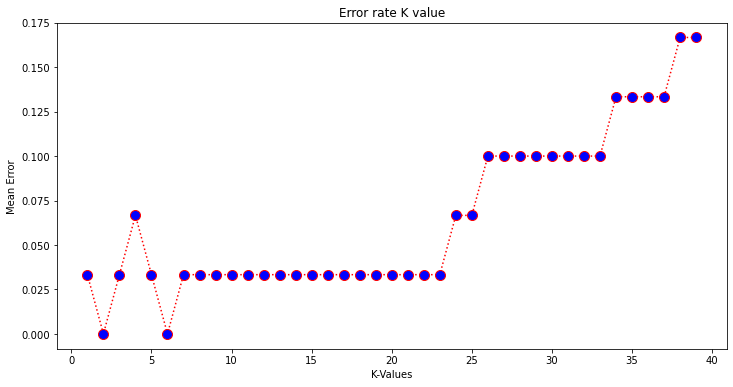

In [92]:
#Now we can plot the values of K vs the error at different K-values

plt.figure(figsize = (12,6))
plt.plot(range(1,40), error, 
         color = 'red', linestyle = 'dotted', marker = 'o',
         markerfacecolor = 'blue', markersize = 10)
plt.title('Error rate K value')
plt.xlabel('K-Values')
plt.ylabel('Mean Error')

In [22]:
# Classification accuracy
from sklearn.metrics import accuracy_score

accuracy_score(Y_test,Y_predicted)



0.9666666666666667

## Summary

### Steps to implement the K- Nearest neighbor classifier: